# EEE 526 EXAM
## EEG/2015/061

In [117]:
#importing libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as stats
import seaborn as sea

## Question 1

In [57]:
# importing the data from spaceshuttle.csv and dataprocessing
shuttle_data= pd.read_csv('SpaceShuttle.csv')
shuttle_data
#data processing
#oprobfail=pd.DataFrame(np.zeros(23))
#oprobfail[]
shuttle_data['oringprob']='No'
damaged=shuttle_data.loc[:,'Damaged']
damaged
for i in range(23):
    if  ((damaged[i])/6)*100 > 0:
        shuttle_data['oringprob'][i]='Yes'


#oprobfail=oprobfail.loc[0,:]
#oprobfail.convert_dtypes(np.dtype('int32'))
#shuttle_data_p=pd.concat([shuttle_data,oprobfail.set_axis(shuttle_data.index)],axis=1,names="fail")
#shuttle_data_p.rename(columns={'null':'opron'})
#shuttle_data['oprobfail']=oprobfail
#oprobfail_int=[33,17,17,17,0,0,0,0,0,0,0,0,17,17,0,0,0,33,0,0,0,0,0]
#shuttle_data['oprobfailint']=oprobfail_int
shuttle_data

<ipython-input-57-5dafd645c4f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuttle_data['oringprob'][i]='Yes'


,Damaged,Temp,oringprob
0,2,53,Yes
1,1,57,Yes
2,1,58,Yes
3,1,63,Yes
4,0,66,No
5,0,67,No
6,0,67,No
7,0,67,No
8,0,68,No
9,0,69,No


In [59]:
#fitting a logistic regression model
log_model_shuttle= LogisticRegression()
pred=['Temp']
x=shuttle_data[pred]
y=shuttle_data.oringprob
log_model_shuttle.fit(x,y)
#log_model_shuttle.coef_

print(log_model_shuttle.classes_)
print(log_model_shuttle.coef_)
print(log_model_shuttle.intercept_)

['No' 'Yes']
[[-0.22950051]]
[14.86192709]


In [72]:
#predicting the probaility of failure for each degree increase in temperature

x_pred=pd.DataFrame(range(100))
x_pred
log_model_shuttle.predict(x_pred)
# probaility of failure for each degree of temperature

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No'], dtype=object)

In [79]:
#removing data for flight 18
shuttle_data_edited1=shuttle_data.loc[0:15,:]
shuttle_data_edited2=shuttle_data.loc[17:22,:]
shuttle_data_edited1.append(shuttle_data_edited2)

,Damaged,Temp,oringprob
0,2,53,Yes
1,1,57,Yes
2,1,58,Yes
3,1,63,Yes
4,0,66,No
5,0,67,No
6,0,67,No
7,0,67,No
8,0,68,No
9,0,69,No


In [80]:
#training logistic model on reduced dataset
log_model_shuttle_2= LogisticRegression()
pred=['Temp']
x=shuttle_data_edited1[pred]
y=shuttle_data_edited1.oringprob
log_model_shuttle_2.fit(x,y)
#log_model_shuttle.coef_
#coefficients are 0.15,-0.081 and -0.072
print(log_model_shuttle_2.classes_)
print(log_model_shuttle_2.coef_)
print(log_model_shuttle_2.intercept_)

['No' 'Yes']
[[-0.32482337]]
[21.0143003]


In [86]:
#predicting the probaility of failure for each degree increase in temperature

x_pred=pd.DataFrame(range(100))
x_pred
log_model_shuttle_2.predict(x_pred)
# probaility of failure for each degree of temperature


array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No'], dtype=object)

In [87]:
# probability of failure when temp is 31 fahrenhiet
log_model_shuttle_2.predict(pd.DataFrame([31]))

array(['Yes'], dtype=object)

## Question 2


In [143]:
#importing dataset
exam_data=pd.read_csv('ExamScores.csv')
exam_data

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [90]:
exam_data.describe()

,EXAM1,EXAM2,EXAM3,FINAL
count,25.000000,25.000000,25.000000,25.000000
mean,79.040000,79.480000,81.480000,162.040000
std,12.279658,12.503733,11.765486,24.044195
min,47.000000,46.000000,55.000000,101.000000
25%,73.000000,73.000000,73.000000,148.000000
50%,79.000000,82.000000,85.000000,164.000000
75%,88.000000,89.000000,90.000000,180.000000
max,96.000000,98.000000,100.000000,196.000000


C:\Users\SIREN PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:label='bc64a7c5-09fe-4791-a7d5-bfa593f7f69e', xlabel='EXAM1'>

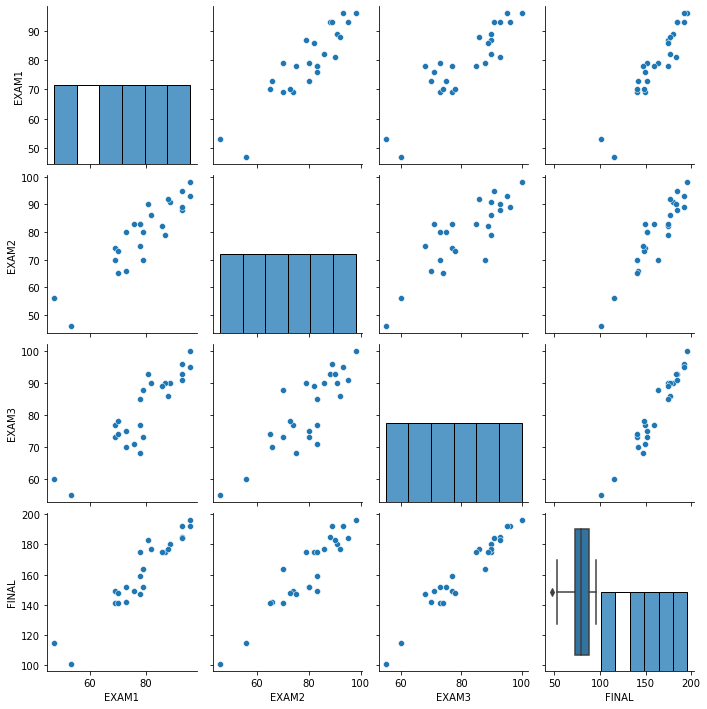

In [91]:
#graphical summary using seaborn
sea.pairplot(exam_data)


[Text(0, 0.5, 'EXAM 3')]

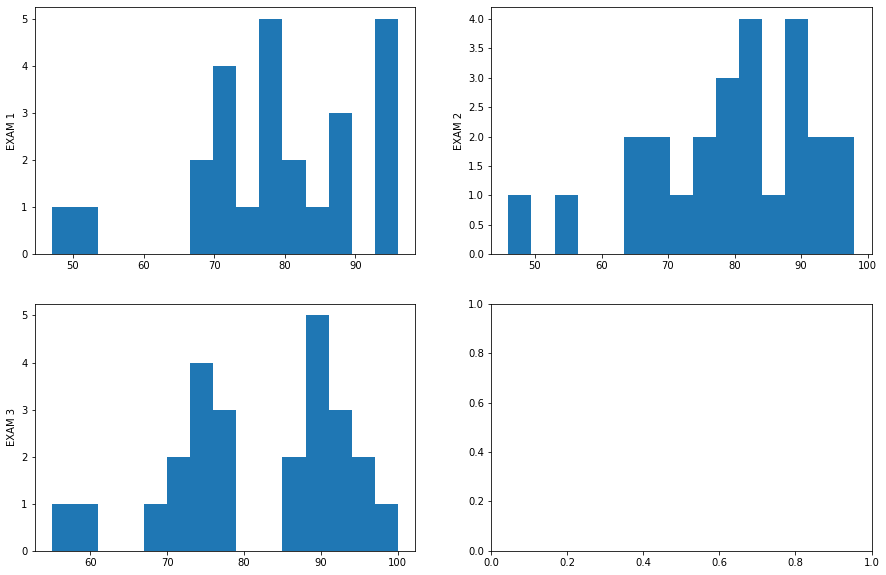

In [111]:
#histograms of data
fig,axes= plt.subplots(2,2,figsize=(15,10))
axes[0,0].hist(exam_data['EXAM1'],bins=15)
axes[0,0].set(ylabel='EXAM 1')

axes[0,1].hist(exam_data['EXAM2'],bins=15)
axes[0,1].set(ylabel='EXAM 2')

axes[1,0].hist(exam_data['EXAM3'],bins=15)
axes[1,0].set(ylabel='EXAM 3')

C:\Users\SIREN PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXAM1'>

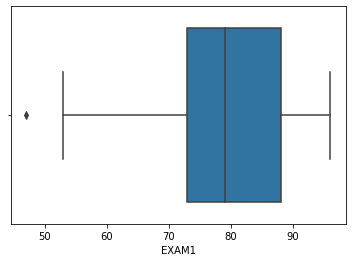

In [114]:
#boxplot of data
sea.boxplot(exam_data.EXAM1)

C:\Users\SIREN PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXAM2'>

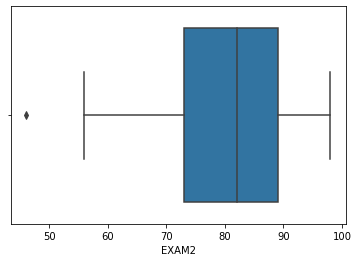

In [115]:
#boxplot of data
sea.boxplot(exam_data.EXAM2)

C:\Users\SIREN PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXAM3'>

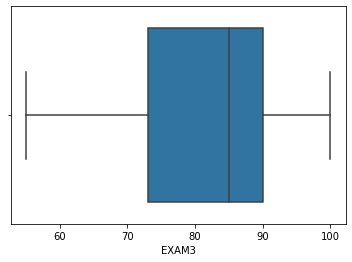

In [116]:
#boxplot of data
sea.boxplot(exam_data.EXAM3)

In [135]:
#mlr with final exam as dependent variable
final_formula='FINAL~EXAM1+EXAM2+EXAM3'
final_model=stats.ols(final_formula,exam_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FINAL   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     670.1
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           5.34e-21
Time:                        14:11:00   Log-Likelihood:                -57.312
No. Observations:                  25   AIC:                             122.6
Df Residuals:                      21   BIC:                             127.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3361      3.764     -1.152      0.262     -12.164       3.492
EXAM1          0.3559      0.121      2.932      0.008       0.103       0.608
EXAM2          0.5425      0.101      5.379      0.000       0.333       0.752
EXAM3          1.1674      0.103     11.333      0.000       0.953       1.382
==============================================================================
Omnibus:                        8.219   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.157
Skew:                           0.993   Prob(JB):                       0.0460
Kurtosis:                       4.401   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
#mlr with exam 1 as dependent variable
exam1_formula='EXAM1~FINAL+EXAM2+EXAM3'
exam1_model=stats.ols(exam1_formula,exam_data).fit()
exam1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EXAM1   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     70.02
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           4.20e-11
Time:                        14:07:29   Log-Likelihood:                -67.685
No. Observations:                  25   AIC:                             143.4
Df Residuals:                      21   BIC:                             148.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5357      5.826      0.607      0.550      -8.581      15.652
FINAL          0.8161      0.278      2.932      0.008       0.237       1.395
EXAM2         -0.0847      0.235     -0.361      0.722      -0.573       0.404
EXAM3         -0.6138      0.394     -1.558      0.134      -1.433       0.206
==============================================================================
Omnibus:                       10.169   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.487
Skew:                          -1.353   Prob(JB):                       0.0144
Kurtosis:                       3.906   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
#mlr with exam 2 as dependent variable
exam2_formula='EXAM2~FINAL+EXAM1+EXAM3'
exam2_model=stats.ols(exam2_formula,exam_data).fit()
exam2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EXAM2   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     86.00
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           5.85e-12
Time:                        14:07:38   Log-Likelihood:                -65.780
No. Observations:                  25   AIC:                             139.6
Df Residuals:                      21   BIC:                             144.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2757      5.271      1.191      0.247      -4.686      17.238
FINAL          1.0681      0.199      5.379      0.000       0.655       1.481
EXAM1         -0.0727      0.202     -0.361      0.722      -0.492       0.347
EXAM3         -1.1553      0.292     -3.960      0.001      -1.762      -0.549
==============================================================================
Omnibus:                        3.170   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                1.588
Skew:                          -0.287   Prob(JB):                        0.452
Kurtosis:                       1.907   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
#mlr with exam 3 as dependent variable
exam3_formula='EXAM3~FINAL+EXAM2+EXAM1'
exam3_model=stats.ols(exam3_formula,exam_data).fit()
exam3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EXAM3   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     250.1
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.38e-16
Time:                        14:09:21   Log-Likelihood:                -51.549
No. Observations:                  25   AIC:                             111.1
Df Residuals:                      21   BIC:                             116.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9379      2.888      1.710      0.102      -1.067      10.943
FINAL          0.7362      0.065     11.333      0.000       0.601       0.871
EXAM2         -0.3700      0.093     -3.960      0.001      -0.564      -0.176
EXAM1         -0.1688      0.108     -1.558      0.134      -0.394       0.057
==============================================================================
Omnibus:                        4.900   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                3.120
Skew:                          -0.808   Prob(JB):                        0.210
Kurtosis:                       3.617   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#null hypothesis is


In [165]:
#prediction for 3 students with grades 40 50 40 , 50 50 50 and 80 80 80
exam_data2=pd.DataFrame(np.array([[40,50,40],[50,50,50],[80,80,80]]),columns=['EXAM1', 'EXAM2', 'EXAM3'])
student_results=exam_data.loc[0,:]
res=final_model.predict(exam_data2)
res




0     83.725133
1     98.958957
2    160.935993
dtype: float64